In [1]:
from graph_tool.all import *
import graph_tool as gt
import pickle
import matplotlib
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import random
import math
import collections
import csv
import timeit
import time
def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
start_time = timeit.default_timer()

#%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
#matplotlib.rcParams.update({'font.size': 18})
from functions_reci_bursty import *
from statistics import *

# a more general path that works for all -sam
x_dir=os.getcwd().split('/');
x_dir=os.getcwd().replace(x_dir[len(x_dir)-1],'')
# os.chdir(x_dir+'data/data_raw')

path_code='/mnt/sdb1/sandeep/1.Reciprocity/codes/'
path_data=x_dir+'data/data_raw/'
path_results='/mnt/sdb1/sandeep/1.Reciprocity/res/'

In [2]:
from ADAM_with_parameters_from_empirical import *

df_edges_email = pd.read_table(
    path_data+'email-Eu-core-temporal.txt',header=None,sep=" ")
df_edges_email.columns = ['from', 'to', 't_second']
# print(df_edges_email)

df_edges_college = pd.read_table(    path_data+'CollegeMsg.txt',header=None,sep=" ")
df_edges_college.columns = ['from', 'to', 't_second']
# print(df_edges_email)


counter_no_reply = 0
counter_event = 0
data = []

import csv
with open(path_data+'calls.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for line in list(spamreader)[1:]:
        counter_event+=1
        if int(line[0].split(',')[-1]) == -1 :
            counter_no_reply += 1
        else:
            L = np.asarray(line[0].split(',')).astype(int)[:-1]
            data.append([L[1],L[2],L[0]])
            
print('counter_no_reply',counter_no_reply)
print('counter_event',counter_event)
print('Proportion of calls with no reply',round(counter_no_reply/counter_event,3))

df_edges_calls = pd.DataFrame(data, columns = ['from', 'to', 't_second'])
df_edges_calls=df_edges_calls.drop_duplicates();

with open(path_data+'sms_ijt.pickle', 'rb') as handle:
    data = pickle.load(handle)
df_edges_sms = pd.DataFrame(data, columns = ['from', 'to', 't_second'])


dict_df_edges={'calls':df_edges_calls, 'sms':df_edges_sms,'college':df_edges_college,'email':df_edges_email}

counter_no_reply 366
counter_event 3600
Proportion of calls with no reply 0.102


In [3]:
# for key_ in dict_df_edges:
#     print(dict_df_edges[key_].head())

In [4]:

def call_to_ADAM(df_edges,alpha,beta):

    [g,g_D]=to_graph(df_edges,'from','to','t_second','t_minutes','t_hours','t_days')
    degree_dist_O = g_D.degree_property_map("out")
    degree_dist_I = g_D.degree_property_map("in")

    k_out=degree_dist_O.a
    k_in=degree_dist_I.a

    # THESE ARE ARE INPUTS WE MUST PROVIDE (FROM THE EMPIRICAL NETWORK)
    N=g.num_vertices()
    E=g.num_edges()

    # CALL TO ACVITY DRIVEN MODEL, RETURN TIME ORDERED EDGELIST
    elist,num_edges=create_ADAM_elist(N,E,k_in,k_out,alpha,beta)


    df_edges_ADA_MODEL=pd.DataFrame(list(elist))
    df_edges_ADA_MODEL.columns = ['from', 'to', 't_second']

    return df_edges_ADA_MODEL

def call_ADAM_and_AVG_measures(df_edges,trials,alpha,beta):

    l_rec=[];E_rec=[];B_nodes=[];B_edges=[];
    for i in range(trials):
        print(i,end="\r")
        df_edges_ADAM_MODEL=call_to_ADAM(df_edges,alpha,beta)
        Y=measures(df_edges_ADAM_MODEL,'ADAM MODEL')
        print(Y.iloc[0,0])
        l_rec.append(Y.iloc[0,0])
        E_rec.append(Y.iloc[0,1])
        B_nodes.append(Y.iloc[0,2])
        B_edges.append(Y.iloc[0,3])
    results = {}
    results['Method'] = 'ADAM'
#     results['P(l_rec)'] = str(round(mean(l_rec),4)) + u"\u00B1" +str(round(variance(l_rec)**(.5),4))
#     results['P(E_rec)'] = str(round(mean(E_rec),4)) + u"\u00B1" +str(round(variance(E_rec)**(.5),4))
#     results['B_nodes'] =str(round(mean(B_nodes),4)) + u"\u00B1" +str(round(variance(B_nodes)**(.5),4))
#     results['B_edges'] = str(round(mean(B_edges),4)) + u"\u00B1" +str(round(variance(B_edges)**(.5),4))
    results['P(l_rec)'] = mean(l_rec)
    results['P(E_rec)'] = mean(E_rec)
    results['B_nodes'] = mean(B_nodes)
    results['B_edges'] = mean(B_edges)


    results_df = pd.DataFrame.from_records([results])
    results_df.set_index("Method", inplace = True)
    return results_df


In [6]:
# dict_res=dict()
# dict_para1para2=dict()
# t_ic=time.time()
# for key_ in dict_df_edges:
#     t_oc=time.time()
#     print(key_)
#     with open("/mnt/sdb1/sandeep/1.Reciprocity/codes/0.z_prog_table_ADAM.txt", "a") as file_object:
#         file_object.write('dataset starting='+(key_)+'----'+str(round(t_oc-t_ic,2))+'\n')

#     df_edges=dict_df_edges[key_]
#     # updated ADAM (memory fit)
    
#     # finiding memory variables 
#     df_ck,leg_,xtick_s,bin_s=compute_df_ck(df_edges)
# #     fig = plt.figure(figsize=(5, 3.5));
# #     ax = fig.add_subplot(1, 1, 1);
# #     leg_=['empirical','$p(n) = c/(c+n) + const. $','$p(n) = c/(c+n)$' ]
# #     ax.legend(leg_,loc=(1.04,0));

#     popt1=plot_pk_vs_n_SINGLE(df_ck,bin_s,1);
# #     popt2=plot_pk_vs_n_SINGLE(df_ck,bin_s,2);
#     print(key_,'------alpha,beta=',popt1)
# # 
# #     alpha=   0.00000001
# #     beta=0.05308854282918241
#     alpha,beta=popt1
#     dict_para1para2[key_]=popt1
    
#     # Calling function that calls ADAM 
#     df_edges_ADAM_MODEL=call_to_ADAM(df_edges,alpha,beta)
#     measures_original=measures(df_edges,'Original Network')
#     trials=3
#     results_df=call_ADAM_and_AVG_measures(df_edges,trials,alpha,beta)
#     dict_res[key_]=pd.concat([measures_original,results_df])
    
#     t_oc=time.time()
#     with open("/mnt/sdb1/sandeep/1.Reciprocity/codes/0.z_prog_table_ADAM.txt", "a") as file_object:
#         file_object.write('dataset FINISHED='+(key_)+'----'+str(round(t_oc-t_ic,2))+'\n')

    
# file_name = path_results+'dict_Table_ADAM_trials_'+str(trials)+'.pkl'
# open_file = open(file_name, "wb")
# pickle.dump(dict_res, open_file)
# open_file.close()

In [7]:
for key_ in dict_res.keys():
    print(key_,dict_res[key_])


calls                   P(E_rec)  P(l_rec)   B_nodes   B_edges
Original Network  0.440576  0.950276  0.071288  0.180625
ADAM              0.824603  0.355090 -0.322046 -0.131836


In [7]:
for key_ in dict_res.keys():
    print(key_,dict_res[key_])


calls                   P(E_rec)  P(l_rec)   B_nodes   B_edges
Original Network  0.466797  0.814159  0.071288 -0.145102
ADAM              0.732478  0.516469 -0.324698 -0.553771
sms                   P(E_rec)  P(l_rec)   B_nodes   B_edges
Original Network  0.746703  0.966507  0.381796  0.184447
ADAM              0.942698  0.577076 -0.251946 -0.320568
college                   P(E_rec)  P(l_rec)   B_nodes   B_edges
Original Network  0.654477  0.765619  0.246205 -0.306779
ADAM              0.649687  0.416533 -0.171312 -0.485463
email                   P(E_rec)  P(l_rec)   B_nodes   B_edges
Original Network  0.471364  0.779272  0.419241 -0.066585
ADAM              0.838574  0.407028  0.068120 -0.178550


In [ ]:
    
# file_name = path_results+'dict_Table_ADAM_trials_'+str(trials)+'.pkl'
# open_file = open(file_name, "wb")
# pickle.dump(dict_res, open_file)
# open_file.close()

In [8]:
for key_ in dict_res.keys():
    print(key_,dict_res[key_])

calls                   P(l_rec)  P(E_rec)   B_nodes  B_edges
Method                                                 
Original Network  0.487923  0.356389  0.382043  0.37652
ADAM              0.264209  0.192599  0.116105 -0.01479
sms                   P(l_rec)  P(E_rec)   B_nodes   B_edges
Method                                                  
Original Network  0.869440  0.693585  0.665318  0.663232
ADAM              0.477528  0.333581  0.250351  0.125059
college                   P(l_rec)  P(E_rec)   B_nodes   B_edges
Method                                                  
Original Network  0.466686  0.505540  0.725572  0.646193
ADAM              0.368671  0.264413  0.486865  0.055023
email                   P(l_rec)  P(E_rec)   B_nodes   B_edges
Method                                                  
Original Network  0.551855  0.371127  0.828329  0.568575
ADAM              0.725932  0.376223  0.649712  0.207363


## Visualizing ADAM network at $\alpha$=1,2,3,4

In [10]:
np.linspace(-4.1,-1.1,4)

array([-4.1, -3.1, -2.1, -1.1])

Gamma= 1.1


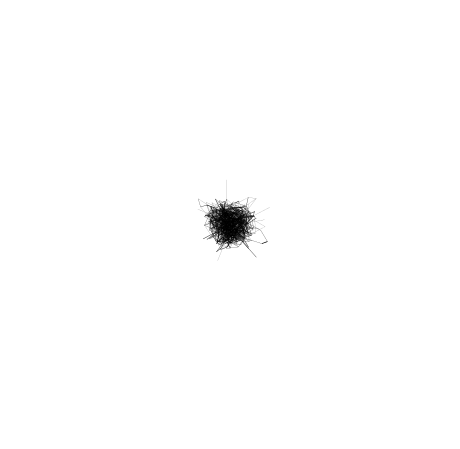

In [92]:

from all_functions import *
from statistics import *

from ADAM_model_power_law import *


N=500      # number of nodes in the empirical network 
epsi=10**-3 # minimum allowed node activity
E=5000;
storeGamma=np.linspace(-4.1,-1.1,4)
Gamma=1.1
l_rec_vs_Gamma=[];E_rec_vs_Gamma=[];B_nodes_vs_Gamma=[];B_edges_vs_Gamma=[];

para1=1;para2=0;

# for Gamma in storeGamma:
g=Gamma+1
print('Gamma=',Gamma,)

elist,num_events=create_ADAM_power_law_elist(N,E,epsi,g,para1,para2)
# Y=measures(elist,'ADAM MODEL')

W_mat=np.zeros([N,N]);
for edge_ in elist:
    source_=edge_[0]
    target_=edge_[1]
    W_mat[source_,target_]=W_mat[source_,target_]+1
    
fig = plt.figure(figsize=(8, 8));    

ax_ = fig.add_subplot(1, 1, 1);

plot_w_networks(fig,W_mat)    

# bv, be = betweenness(g)
# be.a /= be.a.max() / 5
# graph_draw(g, pos=pos, vertex_fill_color=bv, edge_pen_width=be,
#            output="filtered-bt.svg"
           



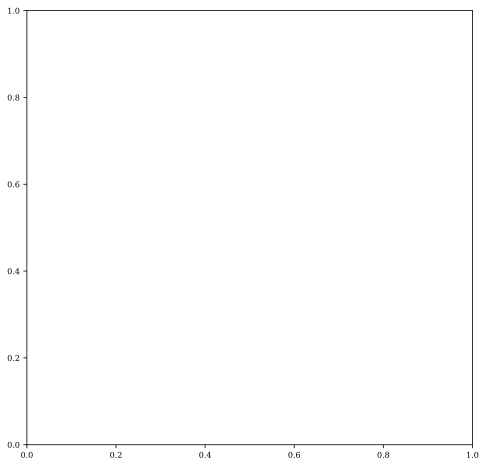

In [90]:
elist_agg=[]
c_edges=0
for i in range(N):
    for j in range(N):
        w=W_mat[i,j];
        if w>0:
            elist_agg.append([i,j,w])
            c_edges=c_edges+1
elist_agg
G = Graph(directed=True);
G.ep["weight"] = G.new_edge_property("int");
eprops = [G.ep["weight"]];
G.add_edge_list(elist_agg, eprops=eprops);
G.num_vertices();
G.num_edges();
# for w in G.ep["weight"]:
#     print(w)
fig = plt.figure(figsize=(8, 8));    
ax_ = fig.add_subplot(1, 1, 1);
gt.draw.fruchterman_reingold_layout(G, weight=G.ep["weight"]);

g = lattice([10, 10])
# gt.draw(g)
gt.draw.fruchterman_reingold_layout(g);


In [44]:
def plot_w_networks(fig,W_mat):


    ##___________________________________________________
    import networkx as nx
    G = nx.Graph()
    G=nx.from_numpy_matrix(abs(W_mat))
    node_list=np.arange(0,10)
    #________________________

    labels = nx.get_edge_attributes(G,'weight')
    all_weights=[]
    for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['weight']) #we'll use this when determining edge thickness
    unique_weights = list(set(all_weights))
#     if i_country==0:
    pos = nx.spring_layout(G)
    for weight in unique_weights:
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        width =.1*weight
#         width = 10*weight*len(node_list)/sum(all_weights)
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width,ax=ax_)
#     axes = plt.gca()
    y_min, y_max = ax_.get_ylim()
    x_min, x_max = ax_.get_ylim()


#     ax_.set_ylim
    aa=1;ax_.set_ylim([ -aa*y_max,aa* y_max])
    ax_.set_xlim([-aa*x_max,aa* x_max])
#     ax_.set_title(countries30[i_country])
    ax_.axis('off')
